In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

from kmodes import kprototypes as kp

import seaborn as sns
import plotly.express as px

np.set_printoptions(edgeitems=3, linewidth=100000000000000000)

In [2]:
df0 = pd.read_csv("HR_capstone_dataset.csv")

In [3]:
df0 = df0.rename(columns={
    "Department":"department", 
    "Work_accident":"work_accident",
    "average_montly_hours" : "average_monthly_hours"
})

In [5]:
df_deduped = df0.drop_duplicates()
df_deduped.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [14]:
df_ohe = pd.get_dummies(df_deduped, drop_first=True)
df_ohe

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,False,False,False,True,False,False,False,False,False,False,False
11996,0.74,0.95,5,266,10,0,0,1,False,False,False,True,False,False,False,False,False,False,False
11997,0.85,0.54,3,185,10,0,0,1,False,False,False,True,False,False,False,False,False,False,False
11998,0.33,0.65,3,172,10,0,0,1,False,False,False,False,True,False,False,False,False,False,False


In [24]:
ss = StandardScaler()
mm = MinMaxScaler()

df_scaled = df_ohe
df_scaled[["satisfaction_level", "last_evaluation", "average_monthly_hours", "time_spend_company"]] = ss.fit_transform(df_scaled[["satisfaction_level", "last_evaluation", "average_monthly_hours", "time_spend_company"]])
df_scaled["number_project"] = mm.fit_transform(df_scaled[["number_project"]])
df_scaled

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,-1.035668,-1.108990,0.0,-0.892208,-0.274291,0,1,0,False,False,False,False,False,False,True,False,False,True,False
1,0.706637,0.851380,0.6,1.262709,1.981036,0,1,0,False,False,False,False,False,False,True,False,False,False,True
2,-2.155721,0.970190,1.0,1.467939,0.477485,0,1,0,False,False,False,False,False,False,True,False,False,False,True
3,0.374770,0.910785,0.6,0.462311,1.229261,0,1,0,False,False,False,False,False,False,True,False,False,True,False
4,-1.077151,-1.168396,0.0,-0.851162,-0.274291,0,1,0,False,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,1.121472,-0.990180,0.2,1.201140,4.988139,1,0,1,False,False,False,True,False,False,False,False,False,False,False
11996,0.457736,1.386026,0.6,1.344801,4.988139,0,0,1,False,False,False,True,False,False,False,False,False,False,False
11997,0.914054,-1.049585,0.2,-0.317563,4.988139,0,0,1,False,False,False,True,False,False,False,False,False,False,False
11998,-1.243085,-0.396129,0.2,-0.584363,4.988139,0,0,1,False,False,False,False,True,False,False,False,False,False,False


In [66]:
num_clusters = np.arange(1, 21, 1)

def kmeans_models(num_clusters, x_vals):
    # inertia = []
    # sil = []
    kms_models = []
    
    for num in num_clusters:
        kms = kp.KPrototypes(n_clusters=num, random_state=0, n_jobs=-1, verbose=True)
        kms.fit(x_vals, categorical=[i for i in range(5, 19)])
        kms_models.append(kms)
        # inertia.append(kms.cost_)
        # sil.append(silhouette_score(x_vals, kms.labels_))

    # return inertia, sil
    return kms_models

def extract_scores(kms_models, x_vals):
    inertias = []
    sils = []

    for model in kms_models[1:]:
        inertias.append(model.cost_)
        sils.append(silhouette_score(x_vals, model.labels_))

    return inertias, sils

In [57]:
# inertia, sil_scores = kmeans_inertia(num_clusters, df_scaled)
kms_models = kmeans_models(num_clusters, df_scaled)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 1
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 5
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 6
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 2
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 6
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 10
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 5
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 8
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 5
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 7
Initialization meth

In [74]:
inertias, sils = extract_scores(kms_models, df_scaled)

[0.15439252698845457,
 0.1616453412905107,
 0.17724108022601412,
 0.16113459437813535,
 0.15535137859381404,
 0.15326675286803332,
 0.14550515217922044,
 0.14453690828294746,
 0.14303185898323167,
 0.13799787456374232,
 0.13175151466900725,
 0.13015116897444737,
 0.13160999345470029,
 0.13503684892486023,
 0.13402977251659612,
 0.12994712406752282,
 0.12689182291621776,
 0.1277045202290846,
 0.13122979308313662]

4


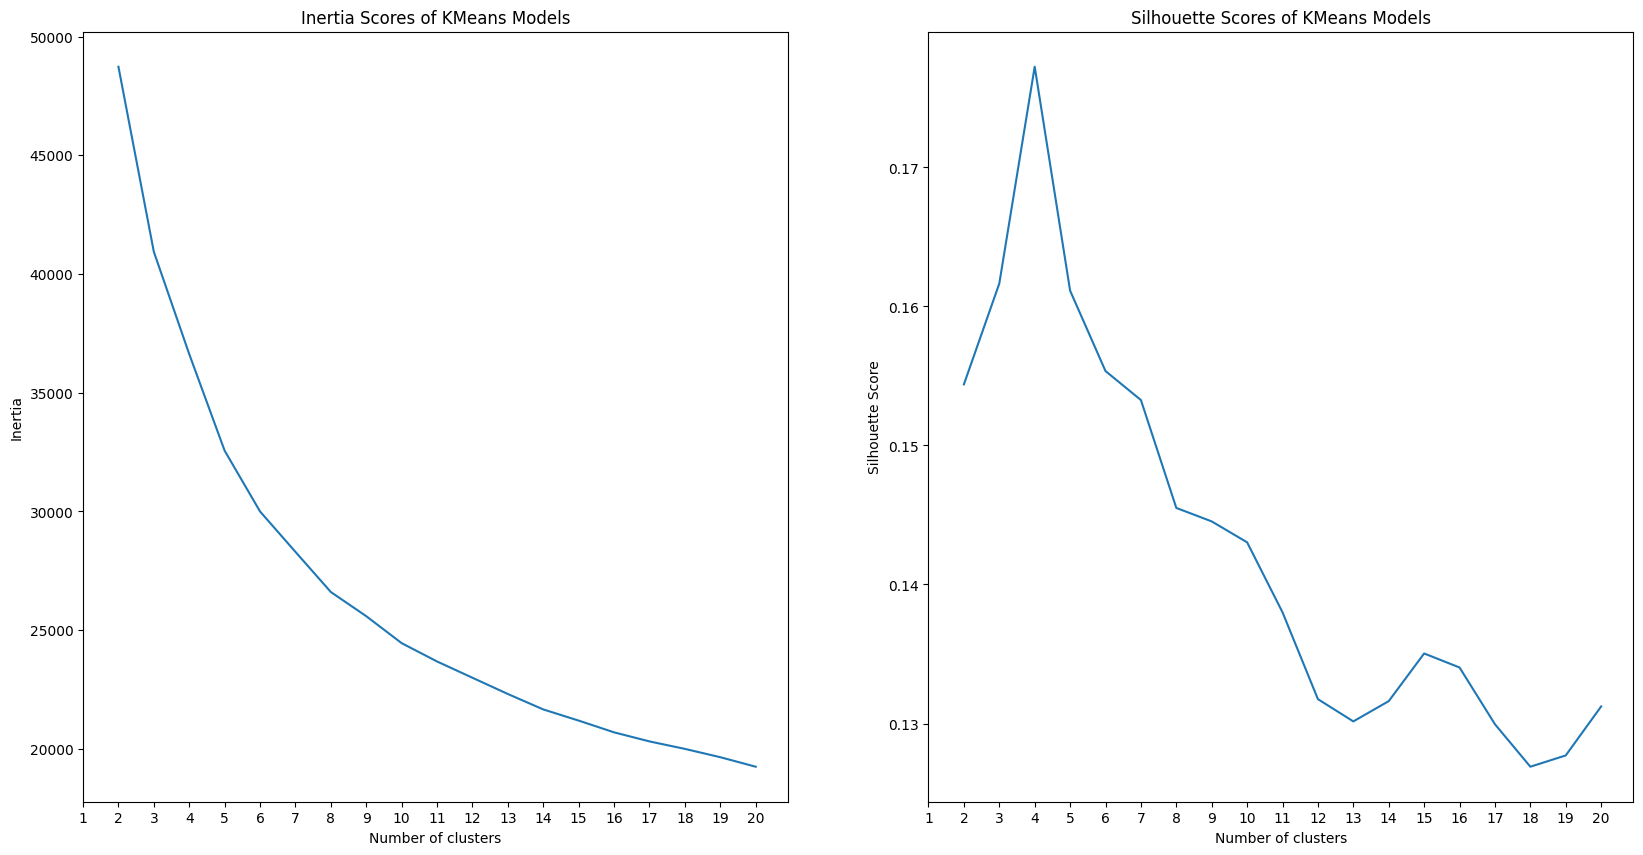

In [97]:
fig, ax = plt.subplots(1,2,figsize=(20,10))

sns.lineplot(x=num_clusters[1:], y=inertias, ax=ax[0])
ax[0].set_xlabel("Number of clusters")
ax[0].set_ylabel("Inertia")
ax[0].set_title("Inertia Scores of KMeans Models")
ax[0].set_xticks(num_clusters)

sns.lineplot(x=num_clusters[1:], y=sils, ax=ax[1])
ax[1].set_xlabel("Number of clusters")
ax[1].set_ylabel("Silhouette Score")
ax[1].set_title("Silhouette Scores of KMeans Models")
ax[1].set_xticks(num_clusters)
print(np.argmax(sils) + 2)

In [99]:
kms4 = kp.KPrototypes(n_clusters=4, random_state=0, n_jobs=-1, verbose=True)
kms4.fit(df_scaled, categorical=[i for i in range(5, 19)]) 

Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 2


KPrototypes(gamma=0.42326379128352504, n_clusters=4, n_jobs=-1, random_state=0,
            verbose=True)

In [113]:
df_analysis = df_deduped
df_analysis["cluster"] = kms4.labels_
df_analysis = df_analysis.drop(columns=["department", "promotion_last_5years"])
df_analysis.head(10)

C:\Users\Cyr\AppData\Local\Temp\ipykernel_6952\781749974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis["cluster"] = kms4.labels_


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,salary,cluster
0,0.38,0.53,2,157,3,0,1,low,1
1,0.80,0.86,5,262,6,0,1,medium,3
2,0.11,0.88,7,272,4,0,1,medium,2
3,0.72,0.87,5,223,5,0,1,low,3
4,0.37,0.52,2,159,3,0,1,low,1
5,0.41,0.50,2,153,3,0,1,low,1
6,0.10,0.77,6,247,4,0,1,low,2
7,0.92,0.85,5,259,5,0,1,low,3
8,0.89,1.00,5,224,5,0,1,low,3
9,0.42,0.53,2,142,3,0,1,low,1


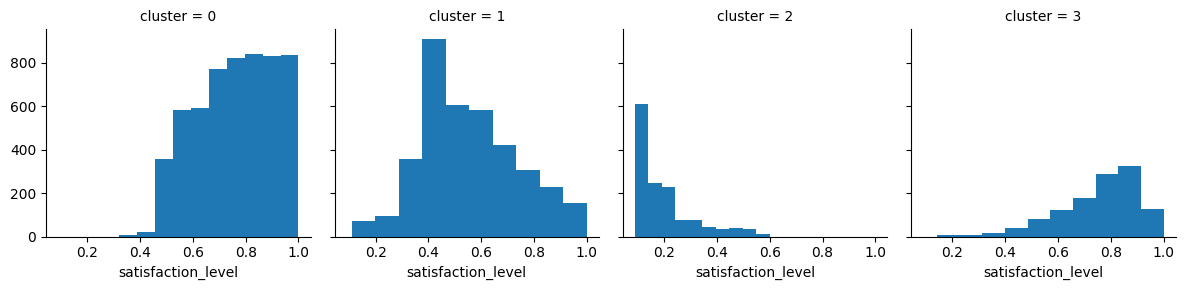

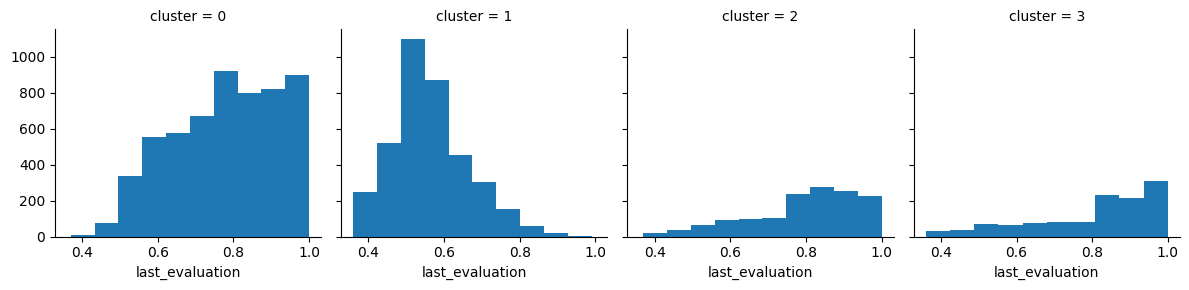

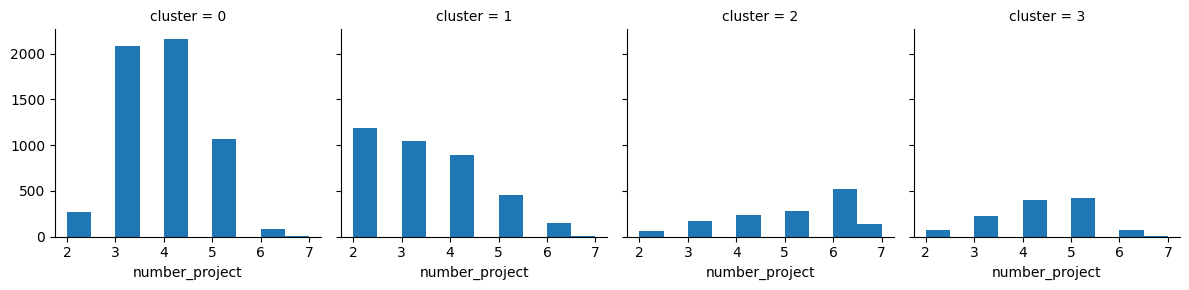

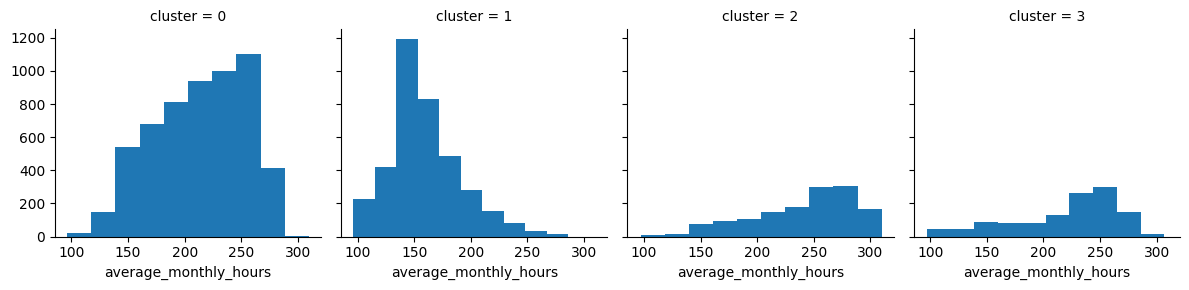

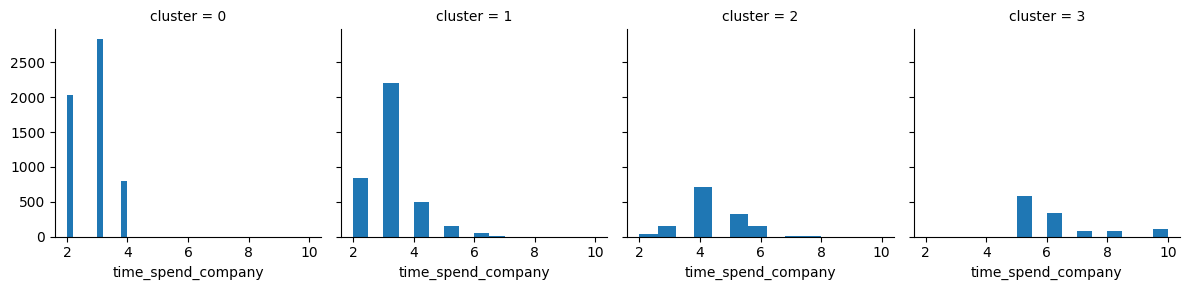

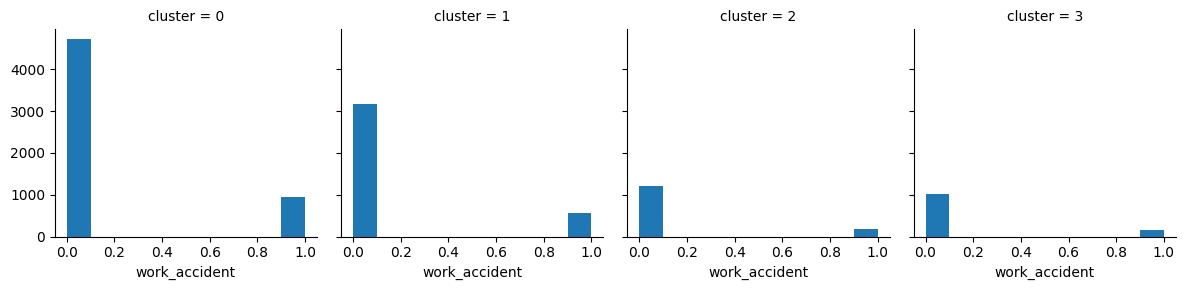

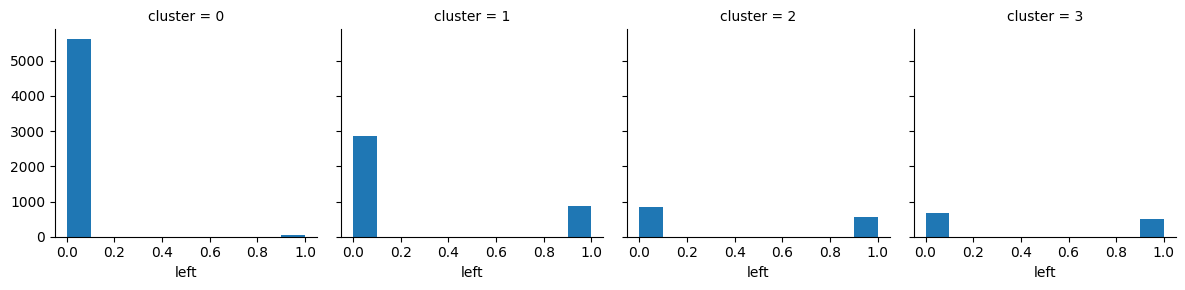

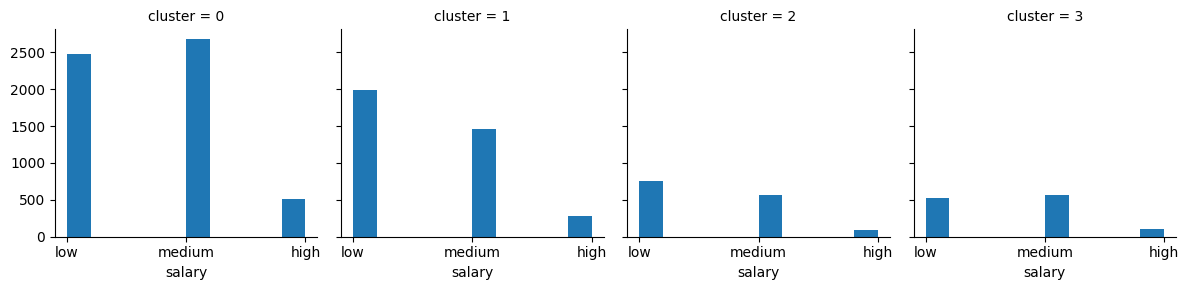

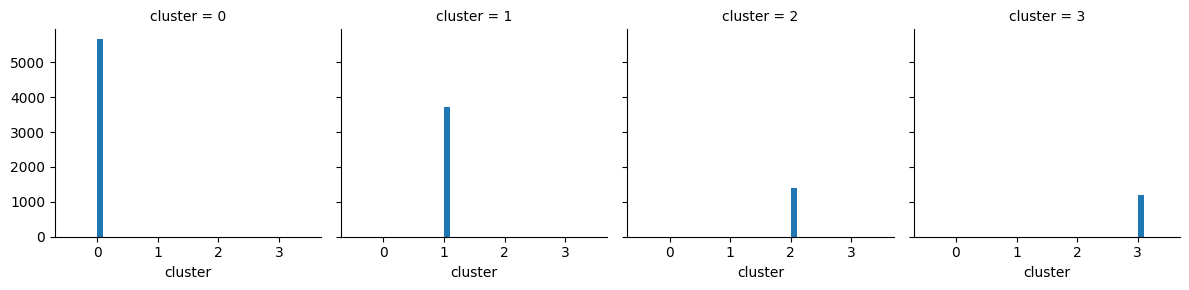

In [114]:
# https://www.kaggle.com/code/sabanasimbutt/clustering-visualization-of-clusters-using-pca
for row in df_analysis:
    grid = sns.FacetGrid(df_analysis, col="cluster")
    grid.map(plt.hist, row)
plt.tight_layout()

With the following assumptions:
- Eyeballing a mean project count of about 4
- Using the average business hours in a month of about 176 hrs
- Tenure is being gauged against the rest of the company

Cluster analysis:
- Cluster 0
    - Possibly just the employees who left.
    - Are generally satisfied and well evaluated
    - Seem to have average number of projects, skewing to a lower number, and work above average hours
    - Seem to have fairly short tenures.
- Cluster 1
    - Maybe low performers?
    - Evaluation scores skew to average or below average
    - Consists of a fair number of low project count employees, and the monthly hours also skews below average
    - Also have fairly short tenures.
- Cluster 2
    - Seems to be employees who are overburdened.
    - Extremely unsatisfied but very well evaluated.
    - Consists of people who have a high project count and high average monthly hours.
    - Tend to have medium length tenures.
- Cluster 3
    - Seems to be a lot of the company seniors (or former seniors).
    - Tend to be highly satisfied and highly evaluated.
    - Tend to have average number of projects and work higher average hours
    - Consists of members with long tenures.

In [173]:
dist = 1 - cosine_similarity(df_scaled)

pca = PCA(3)
pca.fit(dist)
x_pca = pca.transform(dist)

In [195]:
print(pca.components_)
pca.explained_variance_ratio_

[[-0.01431733  0.01170941  0.006259   ... -0.00042502 -0.00169272 -0.00594757]
 [-0.0041909  -0.00628846 -0.01571402 ... -0.00792324 -0.01490542 -0.00219989]
 [ 0.00038421  0.00072858  0.0017157  ... -0.00198633 -0.00577246 -0.00694073]]


array([0.3830918 , 0.24076805, 0.14945233])

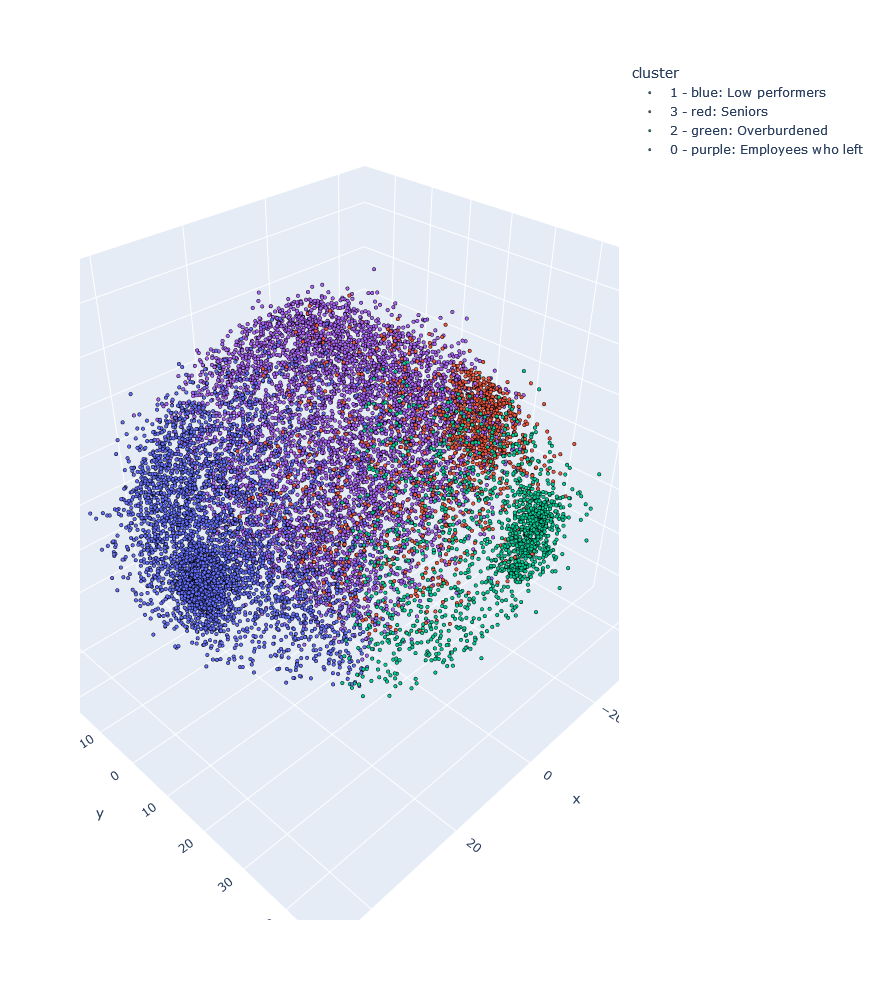

In [171]:
x, y, z = x_pca[:, 0], x_pca[:, 1], x_pca[:, 2]

colors = {0: "purple",
          1: "blue",
          2: "green", 
          3: "red"
         }

names = {0: "Employees who left", 
         1: "Low performers", 
         2: "Overburdened", 
         3: "Seniors"
        }
  
df_pca = pd.DataFrame({"x": x, "y":y, "z":z, "cluster":kms4.labels_})
df_pca["color"] = df_pca["cluster"].replace(colors)
df_pca["description"] = df_pca["cluster"].replace(names)

fig = px.scatter_3d(df_pca, x="x", y="y", z="z", color="cluster",
                    width=1000, height=1000)

fig.update_traces(
    marker=dict(
        size=2,
        line=dict(
            width=1,
            color='DarkSlateGrey'
        )
    ),
    selector=dict(mode='markers'))

fig.for_each_trace(lambda t: t.update(
    name=f"{t.name} - {colors[int(t.name)]}: {names[int(t.name)]}",
    
))